<a href="https://colab.research.google.com/github/Janina712/MLTSA22_JBoecher/blob/main/HW3/HW3_JBoecher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import json
import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")

In [5]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
%cd /content/gdrive/MyDrive//MLTSA22/HW2/Data/Stocks

/content/gdrive/MyDrive/MLTSA22/HW2/Data/Stocks


Import and reshape tss dataframe.

In [7]:
df = glob.glob("*.txt")
df = np.array(df)
print(df)
df = np.sort(df)
print(df)

['ssb.us.txt' 'stkl.us.txt' 'srev.us.txt' ... 'afsi.us.txt' 'agio.us.txt'
 'aep.us.txt']
['a.us.txt' 'aa.us.txt' 'aaap.us.txt' ... 'zx.us.txt' 'zyme.us.txt'
 'zyne.us.txt']


In [8]:
# extract first 10
dataframes = ['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10']

for i in range(0,10):
    dataframes[i] = pd.read_csv(df[i])
    dataframes[i].set_index("Date", inplace=True)

# extract close column
for i in range(0,10):
    dataframes[i] = (dataframes[i]['Close'])
    dataframes[i] = dataframes[i].to_frame()

# merge dataframes
#dfs = [df1, df2, df3, df4, df5, df6, df7, 'df8', 'df9', 'df10']
df2merge = dataframes[0]
for i in range(1,10): 
    df2merge = df2merge.merge(dataframes[i], on = "Date")

df2merge
# column titles
df2merge.columns = ['a.us', 'aa.us', 'aaap.us', 'aaba.us', 'aac.us','aal.us','aamc.us','aame.us','aan.us','aaoi.us']


# rename
tss = df2merge  


**Testing for stationarity (you did it in HW2 but it will be useful have it here under your eyes)**
test if each of these time series is stationary using the AD fuller test using statsmodels.api.tsa.stattools.adfuller()



```
for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])
```



Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [9]:
threshold = 0.05
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for c in tss.columns:
    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)


Stationarity results from the AD Fuller test at a p-value of 0.05
a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False


**1. Question: why did I set the threshold to 0.05? what does 0.05 mean?**

The AD-Fuller test assesses stationarity of the data. As per the documentation, the function seeks to identify and rule out the existence of a unit root in the data. If the data can be described in terms of a unit root, the data is assumed to be non-stationary. 


**The AD-Fuller test postulates:**

Null Hypothesis: Non-Stationarity exists in the data. There is a unit root.

Alternative Hypothesis: The data is stationary. There is no unit root.


Setting the threshold (p-value) to 0.05 means that I reject the null hypothesis when my data is less than 5% likely to have come fom a distribution that has a unit root. In that case, I'm justified to assume stationarity. 

0.05 is the standard threshold value used across many disciplines, such as psychology. This is because two standard deviations away from the mean include 95% of the data. In some fields, a stricter threshold value, like 0.01, is more commonly used. p = 0.01 means that a result that falls within three standard deviations of a distribution will not lead to rejection of the null hypothesis. 



**2. Task: measure autocorrelation**

plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary

As a reminder, the plotting function for the autocorrelation and partial autocorelation functions works as follows

In [10]:
tss_names = list(tss.columns)
print(tss_names[7])

aame.us


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


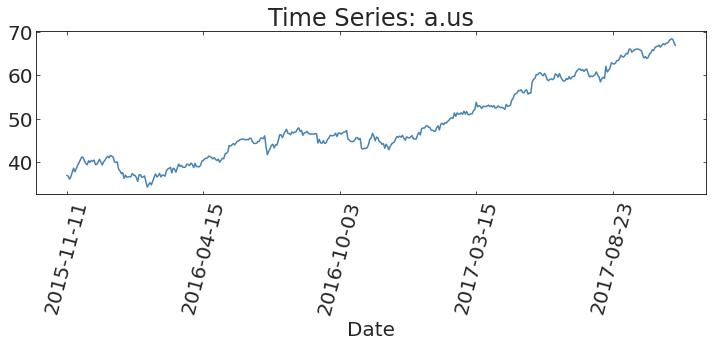

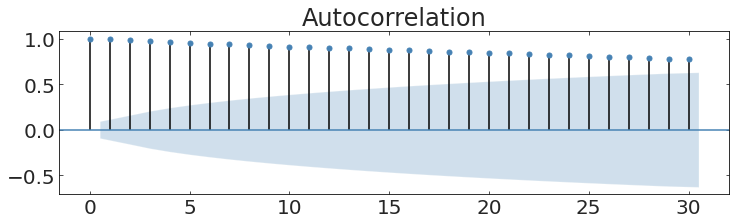

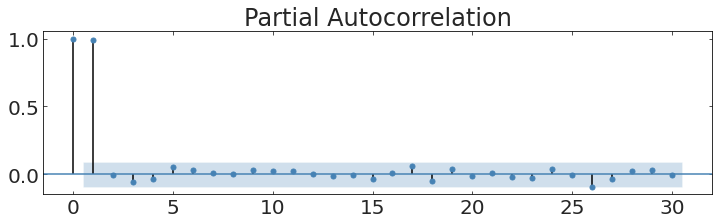

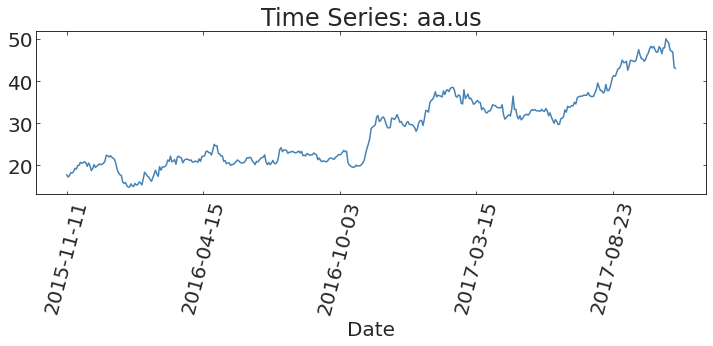

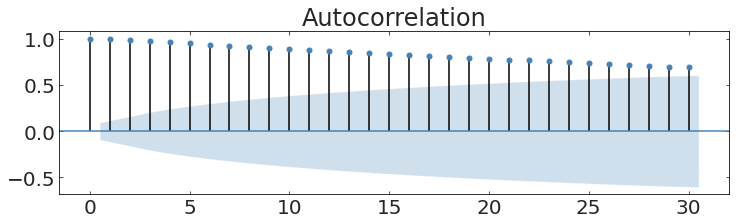

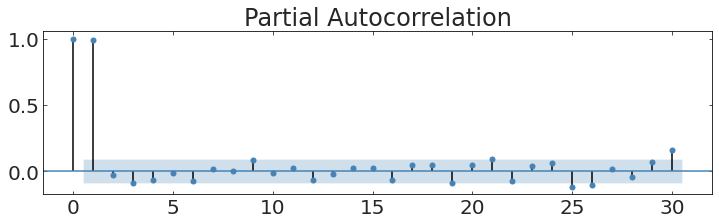

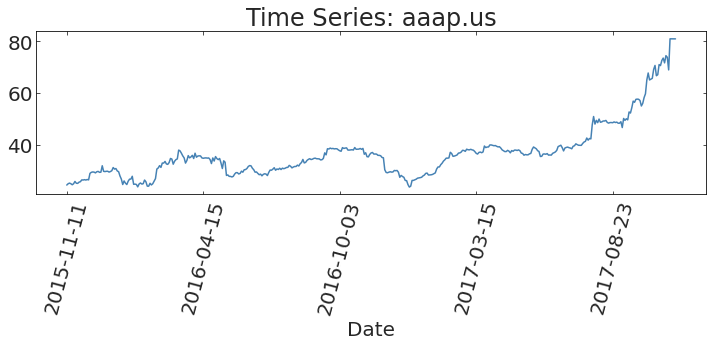

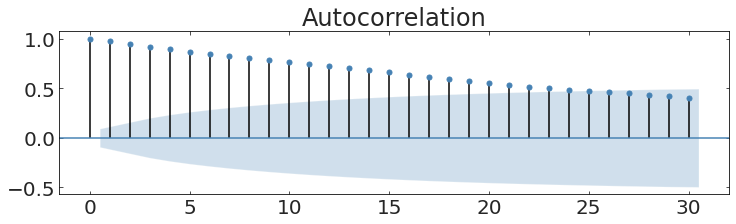

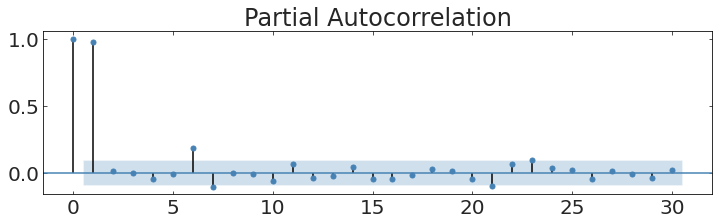

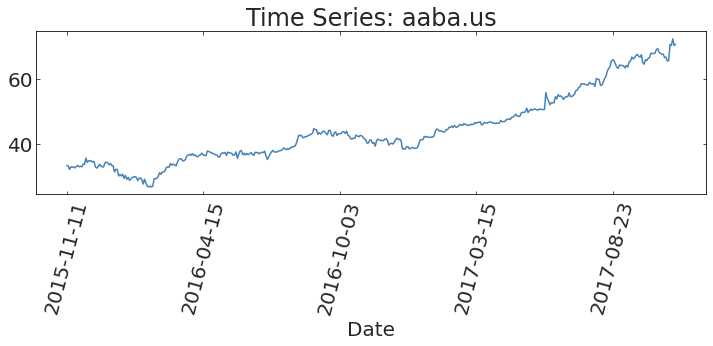

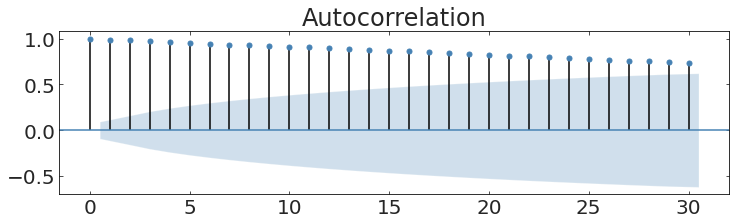

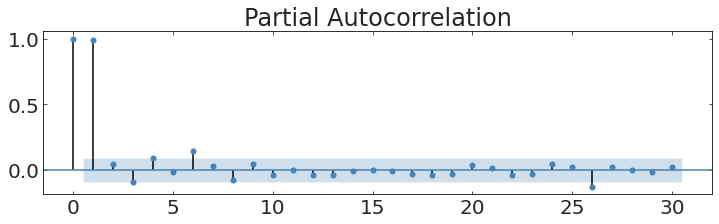

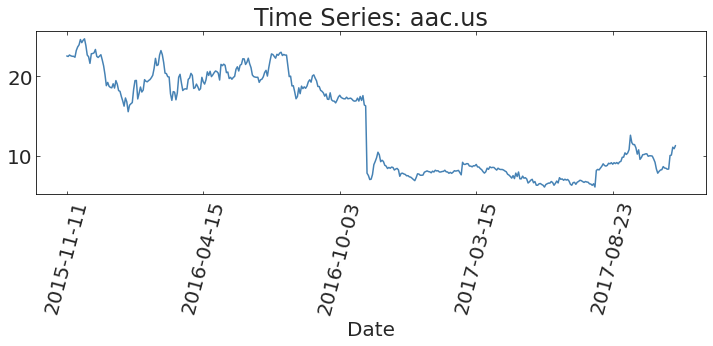

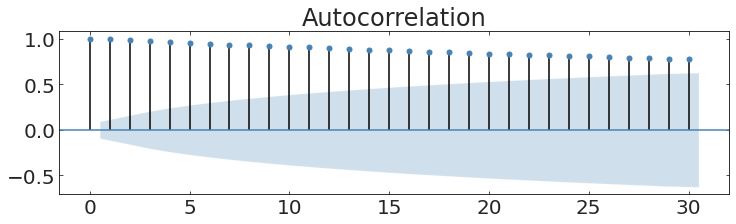

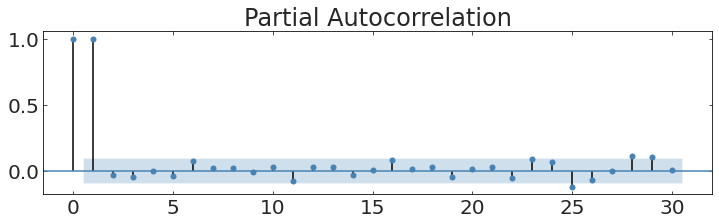

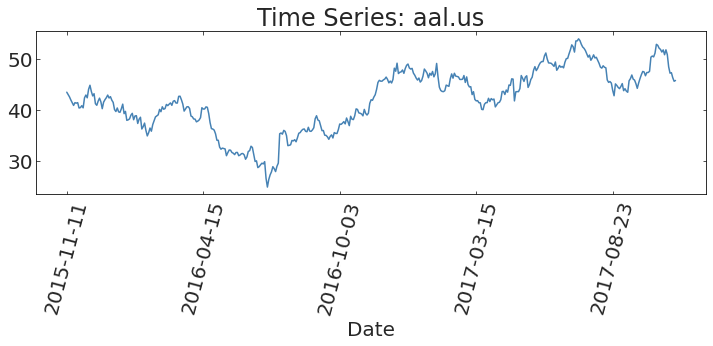

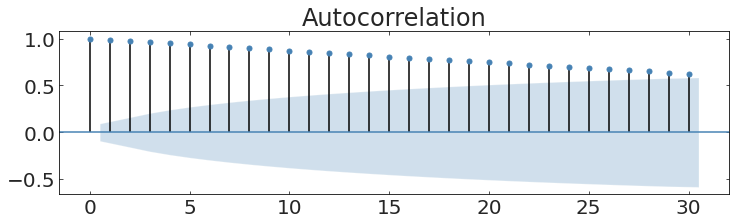

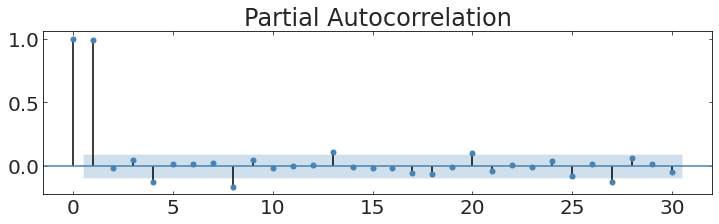

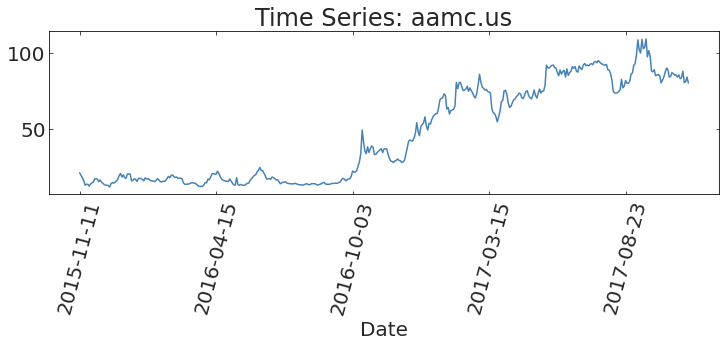

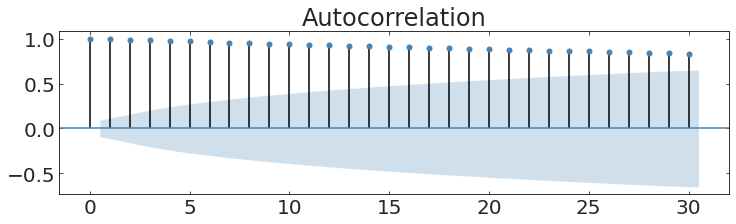

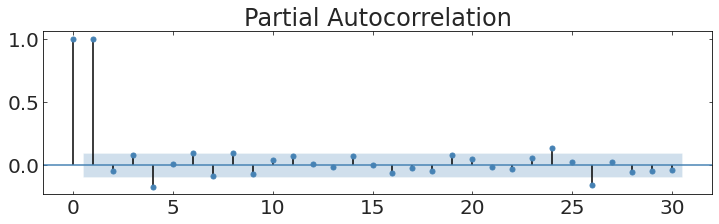

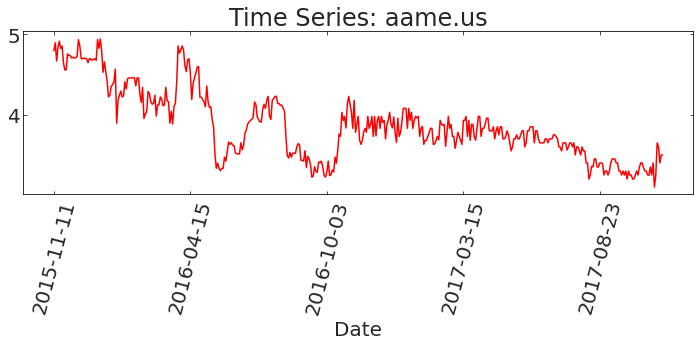

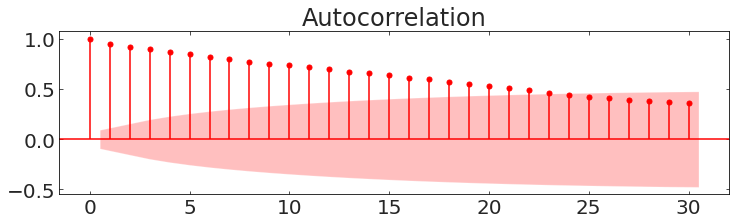

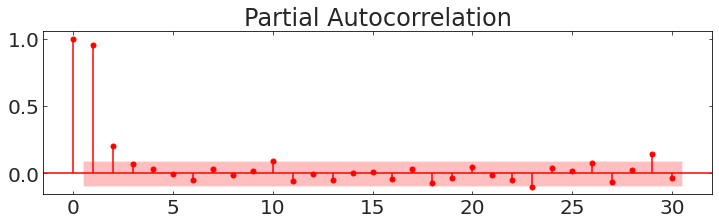

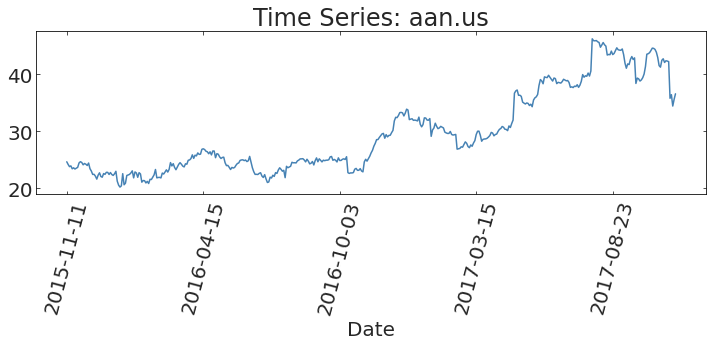

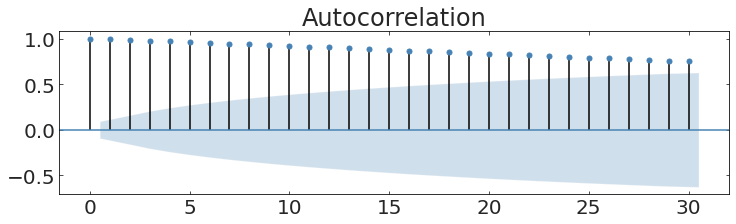

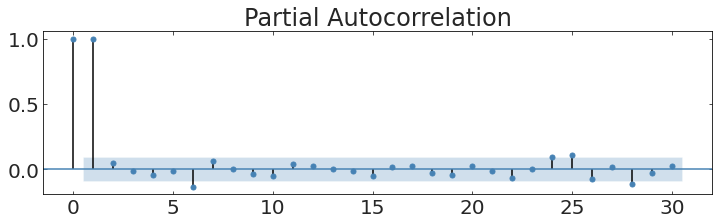

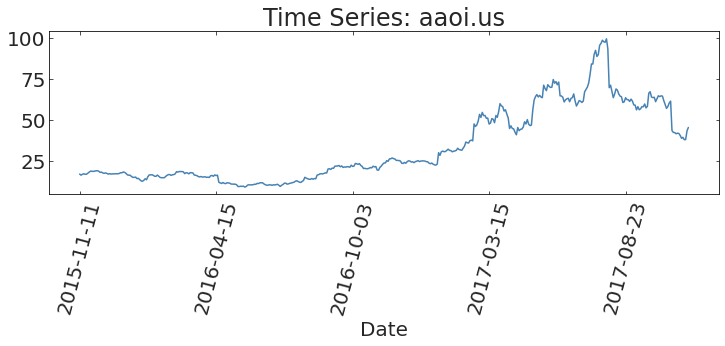

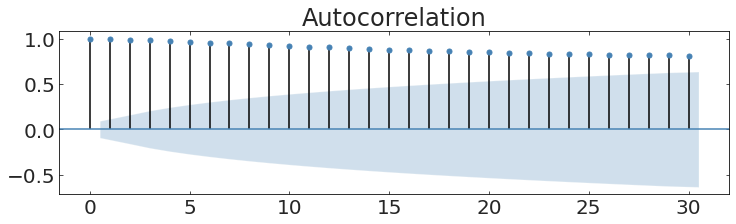

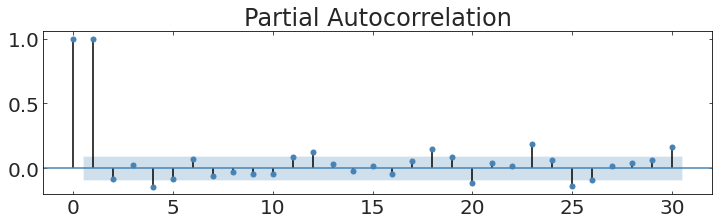

In [11]:
# Stationarity as determined by AD-Fuller Test
for i in range(0,10):    
    if i == 7:
        ax = pl.figure(figsize=(12,3)).add_subplot(111)
        tss[tss_names[i]].plot(rot=75, figsize=(12,3),color = "r");
        ax.set_title(f"Time Series: {tss_names[i]}")
        ax.set_title(f"Time Series: {tss_names[i]}")
        ax = pl.figure(figsize=(12,3)).add_subplot(111)
        sm.graphics.tsa.plot_acf(tss[tss_names[i]], lags=30, ax=ax, color="red", vlines_kwargs={"colors": "red"})
        for item in ax.collections:
            item.set_facecolor("red")
        ax = pl.figure(figsize=(12,3)).add_subplot(111)
        fig = sm.graphics.tsa.plot_pacf(tss[tss_names[i]], lags=30, ax=ax, color="red", vlines_kwargs={"colors": "red"})
        for item in ax.collections:
            item.set_facecolor("red")
    else:
        ax = pl.figure(figsize=(12,3)).add_subplot(111)
        tss[tss_names[i]].plot(rot=75, figsize=(12,3));
        ax.set_title(f"Time Series: {tss_names[i]}")
        ax = pl.figure(figsize=(12,3)).add_subplot(111)
        sm.graphics.tsa.plot_acf(tss[tss_names[i]], lags=30, ax=ax)
        ax = pl.figure(figsize=(12,3)).add_subplot(111)
        fig = sm.graphics.tsa.plot_pacf(tss[tss_names[i]], lags=30, ax=ax);


**3. Question**: 
pick one of the time series (of your choice) and tell me which lags are expected to be significant in the model based on the ACF and PACF plots you made

According to autocorrelation, time series aame.us is expected to be significant for all lags until lag 23, where the bar no longer exceeds the area of uncertainty shaded in blue. 

The partical autocorrelation, which takes the interdependence of time points into consideration, predicts that the first three lags (including time point 0) and possibly lag 10, lag 23 and lag 29 would be significant. 

**4. Task: training and testing split**

To set up a training and test set for this, remove the last two months of data (60 days) and use it as a test set. Were your predictions good enough to make you rich? Predict 100 days forward of the training set

you do not have to overthink it and create differnt variables, you can simply select data without the last 2 month when you pass the data to the fit function. Here, make a plot of the first time series plotting in blue the training data and in orange the test data

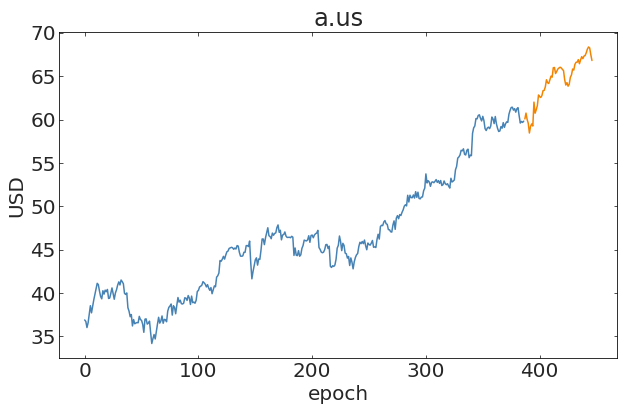

In [12]:
pl.plot(np.arange(tss.shape[0] - 60), tss.loc[:,"a.us"][:-60])
pl.plot(np.arange(tss.shape[0] - 60, tss.shape[0]), tss.loc[:,"a.us"][-60:]);
pl.title("a.us")
pl.xlabel("epoch")
pl.ylabel("USD");


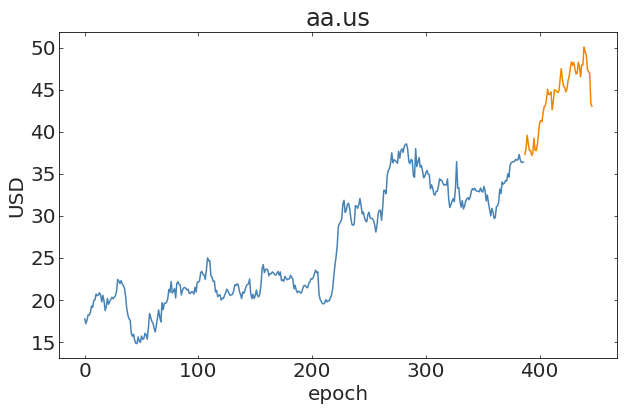

In [13]:
pl.plot(np.arange(tss.shape[0] - 60), tss.loc[:,"aa.us"][:-60])
pl.plot(np.arange(tss.shape[0] - 60, tss.shape[0]), tss.loc[:,"aa.us"][-60:]);
pl.title("aa.us")
pl.xlabel("epoch")
pl.ylabel("USD");

In [14]:
N = tss[['aa.us']].shape[0]
end = N + 40
print(end)

487


In [15]:
training = np.arange(tss.shape[0] - 60), tss.loc[:,"a.us"][:-60]
test = np.arange(tss.shape[0] - 60, tss.shape[0]), tss.loc[:,"aa.us"][-60:]

**Part 2: Model and Forecast**

Here we are doing stock price analysis. The most likely reason is that we want to make $$$ - so we want to forecast the future.

To fit the model to the data use statsmodels.api.tsa.ARMA

You can inspect the function call as statsmodels.api.tsa.ARMA? The statsmodels models are generally fit into 2 phases: generating the model sm.tsa.ARMA(data, parameters), and then fitting it sm.tsa.ARMA(data, parameters).fit().

To look at the model result, including the AIC, look at the model summary mod.summary() What are the best fit parameters based on this printed summary and thewir uncertainties? What is the value of the AIC(Aikiki Information Criterion)

See https://github.com/fedhere/MLTSA22_FBianco/CodeExamples/ARMA/testingARMA_ARIMA.ipynb

**5. Task: Fit one of the stationary time series with ARMA**

a. Fit the model for a variety of parameters. You can run a nested loop to iterate over a range of p and q parameters.

b. At each loop step record the AIC score for each fit.

c. Find the best parameters to fit this time series with the AIC minimization criterion. For each model, after you fit it to the data, you can get the value of the AIC as model.aic

In [16]:
sm.tsa.ARMA?

In [17]:
# example of model output
model11 = sm.tsa.ARMA(tss["aame.us"], (2,2)).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(2, 2)   Log Likelihood                 301.087
Method:                       css-mle   S.D. of innovations              0.123
Date:                Tue, 01 Mar 2022   AIC                           -590.175
Time:                        23:58:42   BIC                           -565.560
Sample:                             0   HQIC                          -580.470
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9279      0.205     19.153      0.000       3.526       4.330
ar.L1.aame.us     0.2083      0.790      0.264      0.792      -1.340       1.756
ar.L2.aame.us     0.7586      0.774      0.980      0.328      -0.759       2.276
ma.L1.aame.us     0.5041      0.788      0.639      0.523      -1.041       2.049
ma.L2.aame.us    -0.2169      0.206     -1.052      0.293      -0.621       0.187
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0190           +0.0000j            1.0190            0.0000
AR.2           -1.2936           +0.0000j            1.2936            0.5000
MA.1           -1.2794           +0.0000j            1.2794            0.5000
MA.2            3.6033           +0.0000j            3.6033            0.0000
-----------------------------------------------------------------------------
"""

In [18]:
# Single time series: aa.us
aics = {}
aics = np.zeros((5,5))

for t in ["aa.us"]:
    for p in range(1,6):
        for q in range(1,6):
            mod = sm.tsa.ARMA(tss["aa.us"], (p,q)).fit()
            aics[p-1,q-1] = mod.aic

print("best parameters in cell located at ", np.where(aics == np.nanmin(aics)), "in aics")
print(" p = 4; q = 5")


best parameters in cell located at  (array([3]), array([4])) in aics
 p = 4; q = 5


In [19]:
# Single time series: aac.us
aics = {}
aics = np.zeros((5,5))

for t in ["aac.us"]:
    for p in range(1,6):
        for q in range(1,6):
            mod = sm.tsa.ARMA(tss["aac.us"], (p,q)).fit()
            aics[p-1,q-1] = mod.aic

print("best parameters in cell located at ", np.where(aics == np.nanmin(aics)), "in aics")
print(" p = 4; q = 4")

best parameters in cell located at  (array([3]), array([3])) in aics
 p = 4; q = 4


In [20]:
# Single time series: aamc.us
aics = {}
aics = np.zeros((5,5))

for t in ["aamc.us"]:
    for p in range(1,6):
        for q in range(1,6):
            mod = sm.tsa.ARMA(tss["aamc.us"], (p,q)).fit()
            aics[p-1,q-1] = mod.aic

print("best parameters in cell located at ", np.where(aics == np.nanmin(aics)), "in aics")
print(" p = 3; q = 2")

best parameters in cell located at  (array([2]), array([1])) in aics
 p = 3; q = 2


In [50]:
# Single time series: aame.us
aics = {}
aics = np.zeros((5,5))

for t in ["aame.us"]:
    for p in range(5):
        for q in range(4):
            mod = sm.tsa.ARMA(tss["aame.us"], (p,q)).fit()
            aics[p-1,q-1] = mod.aic

print("best parameters in cell located at ", np.where(aics == np.nanmin(aics)), "in aics")
print(" p = 3; q = 2")

best parameters in cell located at  (array([0]), array([0])) in aics
 p = 3; q = 2


In [22]:
# Single time series: aaoi.us
aics = {}
aics = np.zeros((5,5))

for t in ["aan.us"]:
    for p in range(1,6):
        for q in range(1,6):
            mod = sm.tsa.ARMA(tss["aan.us"], (p,q)).fit()
            aics[p-1,q-1] = mod.aic

print("best parameters in cell located at ", np.where(aics == np.nanmin(aics)), "in aics")
print(" p = 5; q = 5")

best parameters in cell located at  (array([4]), array([4])) in aics
 p = 5; q = 5


**6. Task: predict the in-set (training) and the future values**

you can use mod.plot_predict() to generate and visualize the prediction at once

In [23]:
?mod.plot_predict()

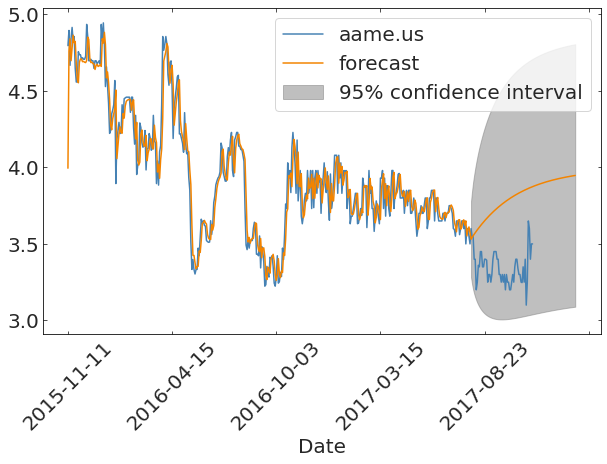

In [46]:
# Predict aame.us
training_aame = tss[['aame.us']][:-60]

# run model with best parameters determined above
mod  = sm.tsa.ARMA(training_aame, (3,2)).fit()

# the lenght of the data
N = training_aame.shape[0]

# plot
ax = tss[['aame.us']].plot()

# end = N +40: predict the next 40 time points after the end of the ts
mod.plot_predict(end=N+100, plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


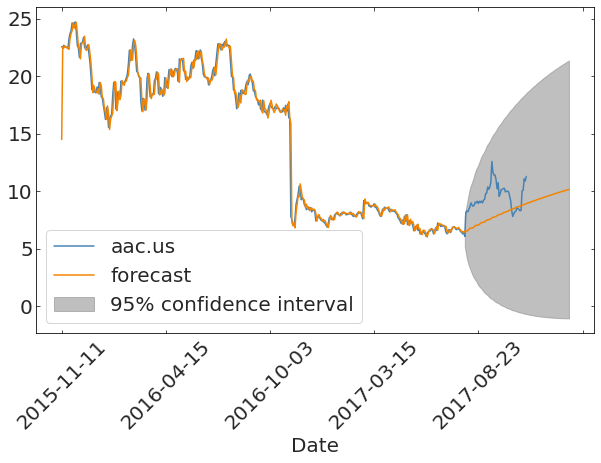

In [25]:
#Predict aac.us
training_aac = tss[['aac.us']][:-60]

# run model with best parameters determined above
mod  = sm.tsa.ARMA(training_aac, (4,4)).fit()

# the lenght of the data
N = training_aac.shape[0]

# plot
ax = tss[['aac.us']].plot()

# end = N +40: predict the next 40 time points after the end of the ts
mod.plot_predict(end=N+100, plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


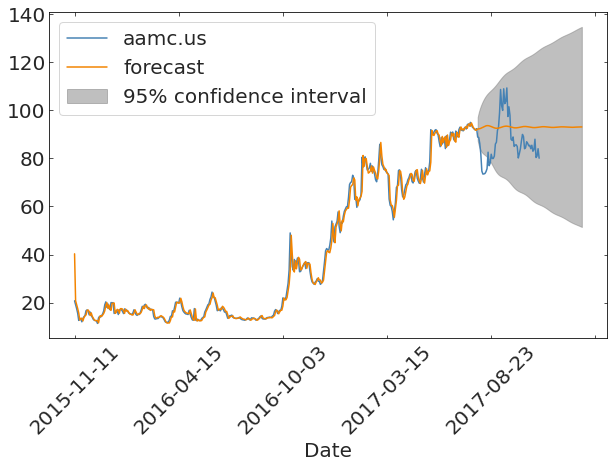

In [26]:
#Predict aamc.us
training_aamc = tss[['aamc.us']][:-60]

# run model with best parameters determined above
mod  = sm.tsa.ARMA(training_aamc, (3,2)).fit()

# the lenght of the data
N = training_aamc.shape[0]

# plot
ax = tss[['aamc.us']].plot()

# end = N +40: predict the next 40 time points after the end of the ts
mod.plot_predict(end=N+100, plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


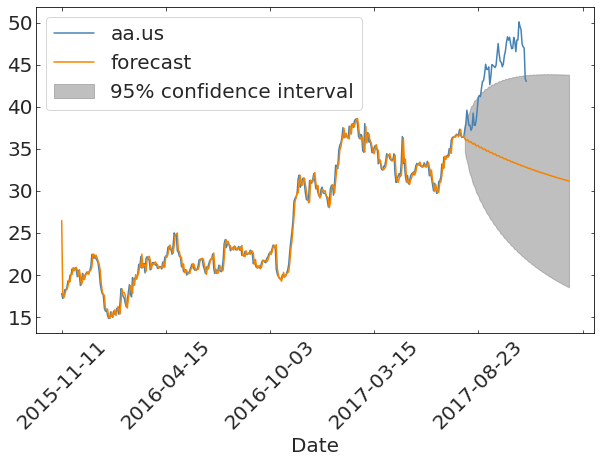

In [27]:
#Predict aa.us
training_aa = tss[['aa.us']][:-60]

# run model with best parameters determined above
mod  = sm.tsa.ARMA(training_aa, (4,5)).fit()

# the lenght of the data
N = training_aa.shape[0]

# plot
ax = tss[['aa.us']].plot()

# end = N +40: predict the next 40 time points after the end of the ts
mod.plot_predict(end=N+100, plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


**7. Question: Did you make money??**

aame.us: No, because my forecast predicts an upward trend, while the raw data actually went down.  

aac.us: Yes, the forecast represents the general trend of the raw data quite well. Both go upward.

aamc.us: Neither. The forecast predicts an almost horizontal line, which seems to be at about the mean of the raw data during the last 40 days of the timeseries. 

aa.us: No. The forecast predicted a downward trend, while an upward trend was observed. In fact, the raw data lies outside the 95% confidence interval. 

**8. Question: what are the coefficients of the best fit model? what do they mean?**

The coefficients associated with each parameter of the models are listed below. 

The parameter p refers to the number of observations that is used to calculated the autoregression part of the model. For example, p = 3 means that an optimal AIC value is obtained when using three previous timepoints to predict an upcoming one. 

The parameter q represents the counterpart to p in the moving average part of the model. Q indicates how many time stamps make up the window over which the model averages. For example, q = 2 means that an optimal AIC value is obtained when using a window that spans 2 time points the calculate the moving average. 

The coefficients represent the weighting of each parameter. A large coefficient shows that the corresponding parameter is extremely important in predicting the current one. Coefficients near zero indicate that the parameter bears little importance in forecasting the next point. 



**aa.us: coeff**

ar.L1	0.4233	
ar.L2	-0.3917	
ar.L3	0.9435	
ar.L4	0.0154	
ma.L1	0.5929	
ma.L2 0.9576	
ma.L3 0.1224	
ma.L4	0.0559	
ma.L5	0.1538	

**aac.us:**

ar.L1	0.8828		
ar.L2	-0.1276		
ar.L3	-0.6000	
ar.L4	0.8292

ma.L1	0.1324	
ma.L2	0.3135		
ma.L3	0.8750	
ma.L4	0.0940

**aamc.us:**

ar.L1	-0.0827	

ar.L2	0.2611	
ar.L3	0.8111	

ma.L1 1.0686	

ma.L2	0.7123	

**aaoi.us:**

ar.L1	1.4404	
ar.L2	-1.6427	
ar.L3	1.6125	
ar.L4	-1.3305		
ar.L5	0.9061	

ma.L1	-0.4814		
ma.L2	1.2860		
ma.L3	-0.4979	

ma.L4	1.0265		
ma.L5	-0.0635		

**9. Task: choose 2 non stationary time series in the set that are not correlated and repeat Tasks 5 amd 6 with the ARIMA model**

choose integration 1 to start ...

In [28]:
# example of model output
mod = sm.tsa.ARIMA(tss["a.us"], (2,1,2)).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.a.us   No. Observations:                  446
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -419.255
Method:                       css-mle   S.D. of innovations              0.618
Date:                Wed, 02 Mar 2022   AIC                            850.510
Time:                        00:01:50   BIC                            875.112
Sample:                             1   HQIC                           860.210
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0668      0.029      2.267      0.024       0.009       0.124
ar.L1.D.a.us     0.0290      0.022      1.315      0.189      -0.014       0.072
ar.L2.D.a.us    -0.9792      0.016    -61.482      0.000      -1.010      -0.948
ma.L1.D.a.us    -0.0363      0.010     -3.691      0.000      -0.056      -0.017
ma.L2.D.a.us     1.0000      0.011     89.876      0.000       0.978       1.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0148           -1.0105j            1.0106           -0.2477
AR.2            0.0148           +1.0105j            1.0106            0.2477
MA.1            0.0181           -0.9998j            1.0000           -0.2471
MA.2            0.0181           +0.9998j            1.0000            0.2471
-----------------------------------------------------------------------------
"""

In [29]:
print(tss_names)

['a.us', 'aa.us', 'aaap.us', 'aaba.us', 'aac.us', 'aal.us', 'aamc.us', 'aame.us', 'aan.us', 'aaoi.us']


In [30]:
sm.tsa.ARIMA?


**Task 5: ARIMA model**

In [31]:
# Choose best parameters
# why does arima only work if we choose the same number of parameters for p and q? 
# Single time series: aaap.us
aics = {}
aics = np.zeros((5,5))

for t in ["aaap.us"]:
    for p in range(5):
        for q in range(5):
            try:
              mod = sm.tsa.ARIMA(tss["aaap.us"], (p,1,q)).fit()
              aics[p,q] = mod.aic
            except:
               aics[p][q] = np.nan
 
p,q = (np.where(aics == np.nanmin(aics)))
print(aics)
print("best parameters: p: {:d} q: {:d}".format(p[0],q[0]))

[[1461.97068291 1457.17581822 1458.92029397 1456.78798628 1458.49133817]
 [1457.74483163 1459.0824408            nan           nan           nan]
 [1458.05587286 1457.37635098 1461.4391886            nan           nan]
 [1456.06683458 1457.61624417 1454.76383696 1448.3755667            nan]
 [1457.64668308 1459.55761199 1449.80253838 1446.82620155 1474.11205094]]
best parameters: p: 4 q: 3


In [32]:
# Choose best parameters
# Single time series: aal.us
aics = {}
aics = np.zeros((5,5))

for t in ["aal.us"]:
    for p in range(5):
        for q in range(5):
            try:
              mod = sm.tsa.ARIMA(tss["aal.us"], (p,1,q)).fit()
              aics[p,q] = mod.aic
            except:
               aics[p][q] = np.nan
 
p,q = (np.where(aics == np.nanmin(aics)))
print("best parameters: p: {:d} q: {:d}".format(p[0],q[0]))

best parameters: p: 0 q: 0


**Task 6: ARIMA model**

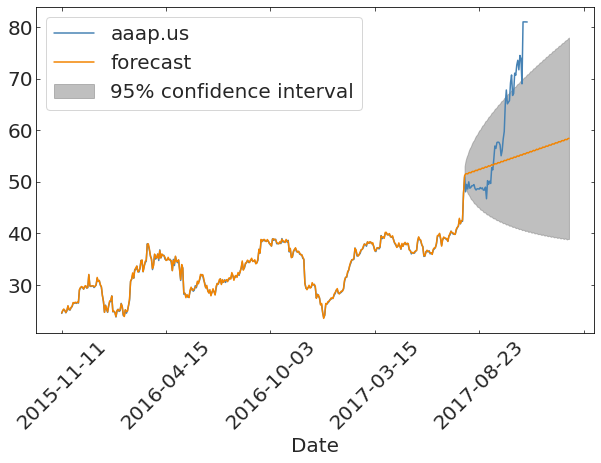

In [33]:
# Predict aaap.us
training_aaap = tss[['aaap.us']][:-60]

# run model with best parameters determined above
# best parameters determined above are: p = 4, q = 3. Execution fails using these parameters. 
# therefore, using second best (second lowest Aic) parameter combination (p =4, q = 2).
mod  = sm.tsa.ARIMA(training_aaap, (4,1,2)).fit()

# the lenght of the data
N = training_aaap.shape[0]

# plot
ax = tss[['aaap.us']].plot()

# end = N +100: predict the next 100 time points after the end of the ts
mod.plot_predict(end=N+100, plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

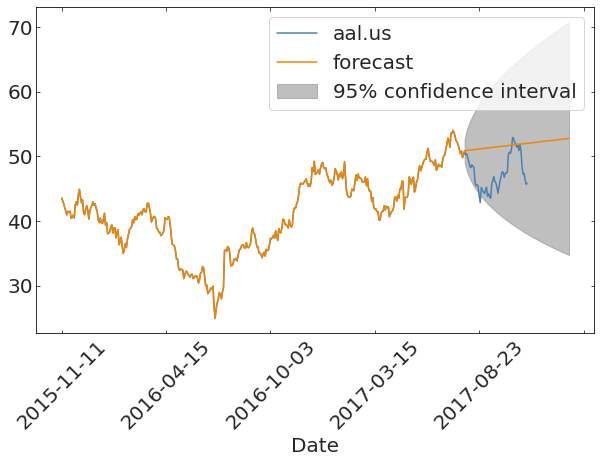

In [34]:
# Predict aal.us
training_aal = tss[['aal.us']][:-60]

# run model with best parameters determined above
mod  = sm.tsa.ARIMA(training_aal, (0,1,0)).fit()

# the lenght of the data
N = training_aal.shape[0]

# plot
ax = tss[['aal.us']].plot()

# end = N +40: predict the next 40 time points after the end of the ts
mod.plot_predict(end=N+100, plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

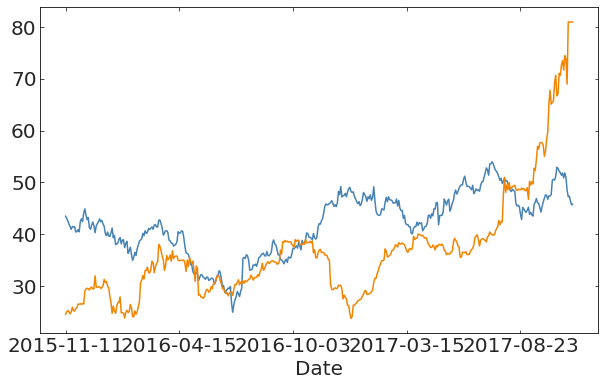

In [35]:
ax = tss["aal.us"].plot()
tss["aaap.us"].plot(ax=ax)

**10. Question: Did you get rich?**

aaap.us: The forecast is too low. Had I acted on the prediction made by the model, I would have sold the stock for a lot less than it was going to be worth. 

aal.us: The forecast looks okay. I'm not sure if I would have become rich, because the forecast is not sensitive to the initial dip observed in the last 40 days of the raw data. 

**Task 11: Redo the fit to one of the non-stsationary lightcurves with a different order of integration and compare the results. What do the coefficients tell you?**

In [36]:
# Choose best parameters
# Single time series: aal.us
aics = {}
aics = np.zeros((5,5))

for t in ["aac.us"]:
    for p in range(5):
        for q in range(5):
            try:
              mod = sm.tsa.ARIMA(tss["aal.us"], (p,2,q)).fit()
              aics[p,q] = mod.aic
            except:
               aics[p][q] = np.nan
 
p,q = (np.where(aics == np.nanmin(aics)))
print("best parameters: p: {:d} q: {:d}".format(p[0],q[0]))

best parameters: p: 2 q: 3


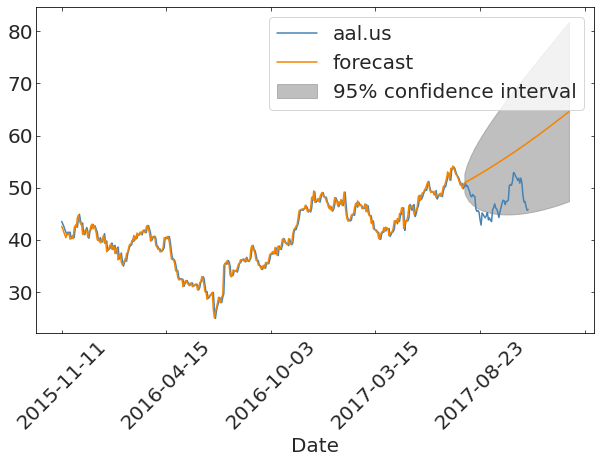

In [54]:
# Predict aal.us
training_aal = tss[['aal.us']][:-60]

# run model with best parameters determined above
mod  = sm.tsa.ARIMA(training_aal, (2,2,3)).fit()

# the lenght of the data
N = training_aal.shape[0]

# plot
ax = tss[['aal.us']].plot()

# end = N +40: predict the next 40 time points after the end of the ts
mod.plot_predict(end=N+100, plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [ ]:
mod.summary()

Changing the order of integration affects the parameter d directly, and leads to a different p-q combination being ideal. 

A larger d involves greater precision when calculating the integral. However, with an increasing number of data points comes the risk on including non-represenative ones, which would make the prediction worse. 

Like before, the coefficients assign a weighting to the parameter levels of p and q. 



ar.L1.D2.aal.us	-0.4892	
ar.L2.D2.aal.us	-0.9246	
ma.L1.D2.aal.us	-0.5479	
ma.L2.D2.aal.us	0.4177	
ma.L3.D2.aal.us	-0.8695	